## ML Model Training

### 1. Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
warnings.filterwarnings("ignore")

### 2. Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('preprocessed.csv')

In [4]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.0,0.0,-1.34903,0.960817,1.457670,-0.102240,-1.414214,-0.816497,-1.414214,25,18,1.2
1,1.0,0.0,-1.34903,0.615199,1.457670,0.238559,-0.707107,-0.816497,-0.707107,32,16,1.4
2,0.0,0.0,-1.34903,-1.458506,1.059399,0.579358,0.000000,-0.816497,0.000000,40,8,0.8
3,1.0,0.0,-1.34903,-0.421653,0.661129,1.260957,0.707107,-0.816497,0.707107,68,10,0.5
4,0.0,0.0,-1.34903,0.269582,1.457670,1.942555,1.414214,-0.816497,1.414214,92,5,0.7


### 3. Preparing X and Y variables

In [5]:
X = df.drop(['roughness','tensile_strength','elongation'],axis=1)

In [6]:
X.shape

(50, 9)

In [7]:
y = df[['roughness','tensile_strength','elongation']]

In [8]:
y.shape

(50, 3)

### 4. Train_Test_Split 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 9), (10, 9), (40, 3), (10, 3))

### 5. Model Training

In [10]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
class MultiOutputRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model1, model2, model3):
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
    
    def fit(self, X, y):
        self.model1.fit(X, y.iloc[:, 0])
        self.model2.fit(X, y.iloc[:, 1])
        self.model3.fit(X, y.iloc[:, 2])
        return self
    
    def predict(self, X):
        pred1 = self.model1.predict(X)
        pred2 = self.model2.predict(X)
        pred3 = self.model3.predict(X)
        return np.vstack((pred1, pred2, pred3)).T
    
    def evaluate(self,X,y):
        predicted = self.predict(X)
        true = y
        mae = mean_absolute_error(true, predicted)
        mse = mean_squared_error(true, predicted)
        rmse = np.sqrt(mean_squared_error(true, predicted))
        r2_square = r2_score(true, predicted)
        return mae, rmse, r2_square

In [11]:
models = {
    "Linear Regression": [LinearRegression(),LinearRegression(),LinearRegression()],
    "Lasso": [Lasso(),Lasso(),Lasso()],
    "Ridge": [Ridge(),Ridge(),Ridge()],
    "K-Neighbors Regressor": [KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()],
    "Decision Tree": [DecisionTreeRegressor(),DecisionTreeRegressor(),DecisionTreeRegressor()],
    "Random Forest Regressor": [RandomForestRegressor(),RandomForestRegressor(),RandomForestRegressor()],
    "XGBRegressor": [XGBRegressor(), XGBRegressor(),XGBRegressor()],
    "CatBoosting Regressor": [CatBoostRegressor(verbose=False),CatBoostRegressor(verbose=False),CatBoostRegressor(verbose=False)],
    "AdaBoost Regressor": [AdaBoostRegressor(),AdaBoostRegressor(),AdaBoostRegressor()]
}

model_list = []
r2_list =[]
for name,models in models.items():
    
    stacked_model = MultiOutputRegressor(models[0], models[1], models[2])
    
    # train model
    stacked_model.fit(X_train,y_train)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = stacked_model.evaluate(X_train, y_train)
    model_test_mae , model_test_rmse, model_test_r2 = stacked_model.evaluate(X_test, y_test)

    
    print(name)
    model_list.append(name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 20.8462
- Mean Absolute Error: 11.1073
- R2 Score: 0.7796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18.4896
- Mean Absolute Error: 9.8904
- R2 Score: 0.5821


Lasso
Model performance for Training set
- Root Mean Squared Error: 24.3559
- Mean Absolute Error: 13.6896
- R2 Score: 0.4851
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.5434
- Mean Absolute Error: 15.3697
- R2 Score: 0.2767


Ridge
Model performance for Training set
- Root Mean Squared Error: 24.1847
- Mean Absolute Error: 13.4010
- R2 Score: 0.7432
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.4586
- Mean Absolute Error: 15.1774
- R2 Score: 0.4631


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 25.8089
- Mean Absolute Error: 13.7325
- R2 Score: 0.7137
----------

### 6. Results

In [12]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
results.reset_index(drop=True,inplace = True)
results

,Model Name,R2_Score
0,XGBRegressor,0.660685
1,CatBoosting Regressor,0.599188
2,Linear Regression,0.582071
3,Random Forest Regressor,0.564484
4,K-Neighbors Regressor,0.535498
5,AdaBoost Regressor,0.516958
6,Ridge,0.463102
7,Decision Tree,0.281113
8,Lasso,0.276733


In [13]:
results.to_csv('ml_training_results.csv')

### Linear Regression

``Here, we preferred Linear Regression Model, because it's giving same performance as like others, though it is simple, interpretable, and computationally efficient.``

In [14]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
lin_model = MultiOutputRegressor(model1,model2,model3)
lin_model.fit(X_train, y_train)

MultiOutputRegressor(model1=LinearRegression(), model2=LinearRegression(),
                     model3=LinearRegression())

In [15]:
lin_model.evaluate(X_train,y_train)

(11.107316265160476, 20.846192009076468, 0.7795566008782716)

### Evaluation on Test Data

In [16]:
lin_model.evaluate(X_test,y_test)

(9.890395830468663, 18.48959547987824, 0.5820708309244419)

In [17]:
predictions = lin_model.predict(X_test)

##### Roughness

Text(0, 0.5, 'Predicted')

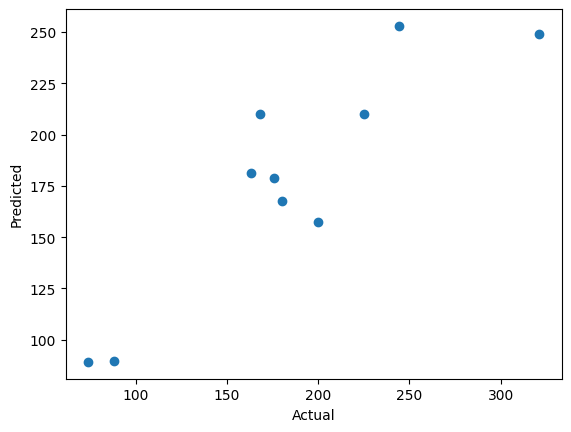

In [18]:
plt.scatter(y_test.iloc[:,0],predictions[:,0].tolist())
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='roughness'>

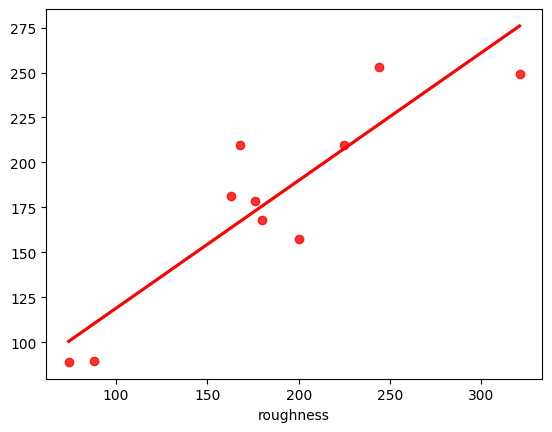

In [19]:
sns.regplot(x=y_test.iloc[:,0],y=predictions[:,0],ci=None,color ='red')

##### Tensile Strength

Text(0, 0.5, 'Predicted')

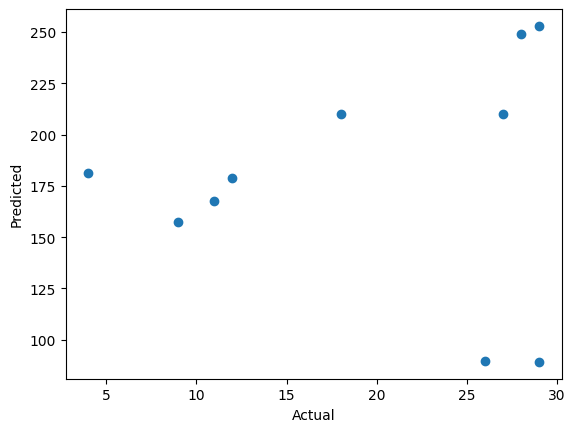

In [20]:
plt.scatter(y_test.iloc[:,1],predictions[:,0].tolist())
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='tensile_strength'>

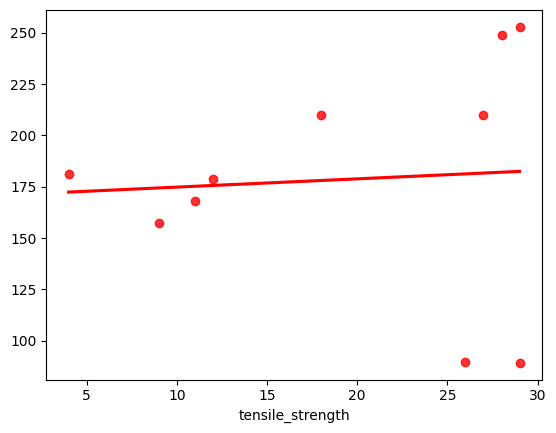

In [21]:
sns.regplot(x=y_test.iloc[:,1],y=predictions[:,0],ci=None,color ='red')

##### Elongation

Text(0, 0.5, 'Predicted')

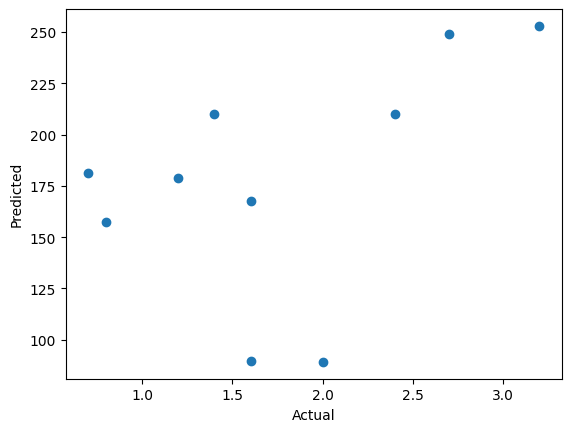

In [22]:
plt.scatter(y_test.iloc[:,2],predictions[:,0].tolist())
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='elongation'>

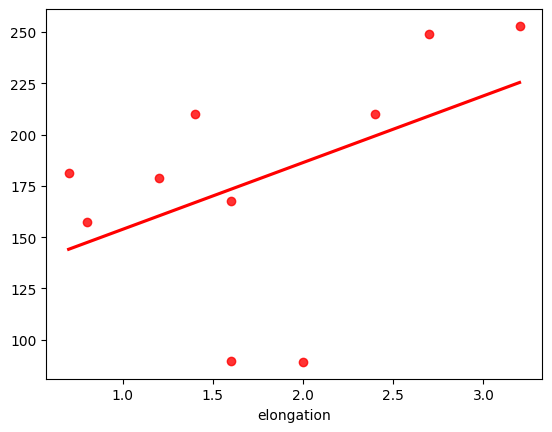

In [23]:
sns.regplot(x=y_test.iloc[:,2],y=predictions[:,0],ci=None,color ='red')

### Saving Model

In [24]:
import pickle
with open('linear_regression_model.p', 'wb') as file:
    pickle.dump(lin_model, file)

### Comments

- This model has a High Variance that is because of high training r2_score but less testing r2_score.
- This indicates an overfitting, the model is failing to generalize on most of the test new data.
- **Reason for overfitting:** Less Amount of data for training (only 40 training examples) 
- **Solution:** Model Performance can be increased if more training data is provided